# Step 1 : Import Packages

In [1]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Step 2 : Initialize Variables

In [2]:
# quantum circuit to make a Bell state
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# Step 3 : Add Gates

In [3]:
qc.h(qr[0])
qc.cx(qr[0], qr[1])

# Step 4 : Visualize the Circuit

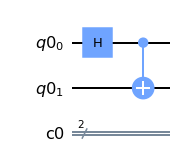

In [4]:
#drawing the circuit
qc.draw('mpl')

In [5]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**2)

# Evolve the state by the quantum circuit
state = state.evolve(qc)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
# measure
qc.measure(qr, cr)

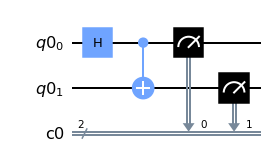

In [7]:
qc.draw('mpl')

# Step 5 : Simulate the Experiment

In [8]:
backend = AerSimulator()
job = backend.run(qc, shots=1024)
result = job.result()

# Step 6 : Visualize the Results

In [9]:
counts = result.get_counts()
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 497, '11': 527}


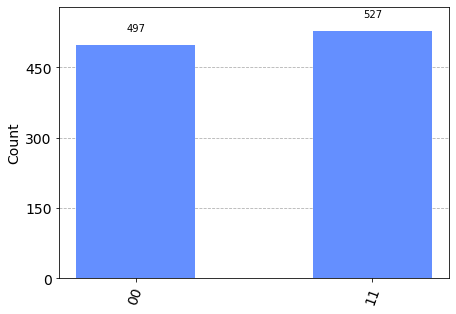

In [10]:
plot_histogram(counts)